<a href="https://colab.research.google.com/github/Snigdhahota/Snigdhahota/blob/main/CNNtumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  inf

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import math
import os
import shutil
import matplotlib.pyplot as plt
import glob

In [ ]:
ROOT_DIR='/content/brain_tumor_dataset'
number_of_images= {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

  number_of_images.items()

#splitting the data as below
*70 as train
*15 as validation
*15 as test

In [ ]:
def datafolder(p, split):
 if not os.path.exists('./'+p):
  os.mkdir('./'+p)
  for dir in os.listdir(ROOT_DIR):
    print(dir)
    os.makedirs('./'+p+'/' + dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)) , size=math.floor(split/100*number_of_images[dir]), replace = False):
      o=os.path.join(ROOT_DIR,dir,img)
      D=os.path.join('./'+p,dir)
      shutil.copy(o,D)
      os.remove(o)
    else:
      print( f"{p} folder exists")


In [ ]:
datafolder("train", 0.7)

yes
train folder exists
no
train folder exists


In [ ]:
datafolder("val", 0.15)

yes
val folder exists
no
val folder exists


In [ ]:
datafolder("test", 0.15)

yes
test folder exists
no
test folder exists


In [ ]:
from keras.layers import Conv2D,MaxPool2D, Dropout, Flatten,Dense, BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential
from keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator

import keras

In [ ]:
from keras.backend import dropout
from prompt_toolkit import filters

keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(224,224,3) ))

model.add(Conv2D(filters=36,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
from tensorflow.python import metrics
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def preprocessingimages1(path):
 image_data= ImageDataGenerator(zoom_range=0.5 ,shear_range=0.5 ,rescale=1/255 ,horizontal_flip= True)
 image=image_data.flow_from_directory(directory=path, target_size=(224, 224) ,batch_size= 32 ,class_mode='binary')
 return image

In [ ]:
path='/content/train'
train_data= preprocessingimages1(path)

Found 172 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [ ]:
def preprocessingimages2(path):


 image_data= ImageDataGenerator(rescale= 1/255)
 image= image_data.flow_from_directory(directory=path, target_size=(224, 224) ,batch_size= 32 ,class_mode='binary')
 return image

In [ ]:
path='/content/val'
val_data= preprocessingimages2(path)

Found 0 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
es= EarlyStopping(monitor='val_accuracy',min_delta=0.01 ,verbose=1 ,mode='auto' ,patience=3 )
mc= ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5' ,verbose=1,mode='auto',save_best_only =True)
cd=[es,mc]

In [ ]:
hs = model.fit_generator(generator=train_data,steps_per_epoch=8,epochs=30,verbose=1,validation_data=val_data,validation_steps=16,callbacks =cd)

Epoch 1/30
6/8 [=====================>........] - ETA: 7s - loss: 0.6303 - accuracy: 0.6570 

8/8 [==============================] - 22s 3s/step - loss: 0.6303 - accuracy: 0.6570


In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
path='/content/test'
test_data= preprocessingimages2(path)

Found 0 images belonging to 2 classes.


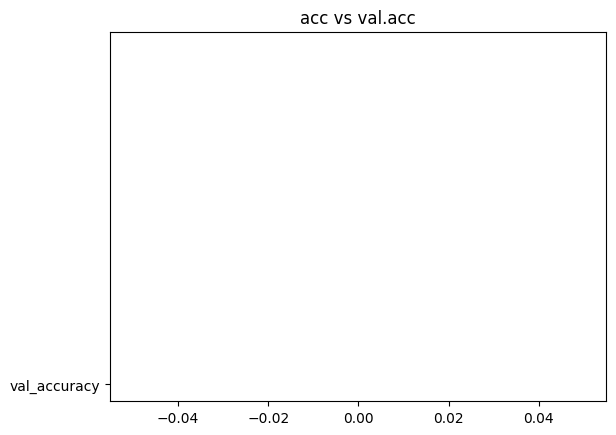

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(['val_accuracy'] , c='red')


plt.title('acc vs val.acc')
plt.show()





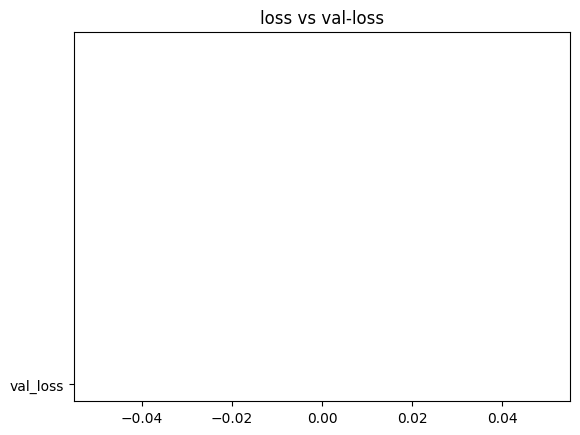

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(['val_loss'] , c='red')


plt.title('loss vs val-loss')
plt.show()





In [ ]:
from keras.models import load_model
model = load_model('./content/bestmodel.h5')


OSError: ignored

In [ ]:
acc = model.evaluate_generator(test_data)
print( f"the accuracy is {acc*100}%")


In [ ]:
from keras.preprocessing.image import load_img,img_to_array

path = "/content/brain_tumor_dataset"
img = load_img(path, target_size=(224/224))
input_arr= img_to_arr(img)/255
plt.imshow(input_arr)
plt.show

input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)

pred= model.predict_classes(input_arr)[0][0]
pred

if pred==0:
 print("tumor")
else:
 print("no tumor")

In [ ]:
train_data.class_indices
